In [21]:
%matplotlib inline

# python modules
from os.path import join
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# my code
from download import data_exists, download
from parse import parse_labels, parse_images
from render import browse
from preprocess import process_images, process_labels

In [22]:
#global constants
DATA_FOLDER_NAME = "data"
URL_BASE = "http://yann.lecun.com/exdb/mnist/"
FILES = {
    "train_labels": "train-labels-idx1-ubyte.gz", 
    "test_labels": "t10k-labels-idx1-ubyte.gz", 
    "train_images": "train-images-idx3-ubyte.gz", 
    "test_images": "t10k-images-idx3-ubyte.gz"
}

In [23]:
if not data_exists(DATA_FOLDER_NAME):
    download(URL_BASE, FILES.values(), DATA_FOLDER_NAME)

In [24]:
#make paths
train_labels_path = join(DATA_FOLDER_NAME, FILES["train_labels"])
test_labels_path = join(DATA_FOLDER_NAME, FILES["test_labels"])
train_images_path = join(DATA_FOLDER_NAME, FILES["train_images"])
test_images_path = join(DATA_FOLDER_NAME, FILES["test_images"])

#parse in as numpy arrarys
train_labels = parse_labels(train_labels_path)
test_labels = parse_labels(test_labels_path)
train_images = parse_images(train_images_path)
test_images = parse_images(test_images_path)

In [25]:
#class labels to strings
train_labels = process_labels(train_labels)
test_labels = process_labels(test_labels)

#images normalized to interval [0,1] and flattened into vector
train_images = process_images(train_images)
test_images = process_images(test_images)

In [26]:
model = MLPClassifier(hidden_layer_sizes=(200,), random_state=1, verbose=True)
model.fit(train_images, train_labels)

print("Training set score: {:0.2f}".format(model.score(train_images, train_labels)))
print("Test set score: {:0.2f}".format(model.score(test_images, test_labels)))

Iteration 1, loss = 0.37123540
Iteration 2, loss = 0.16724467
Iteration 3, loss = 0.11890989
Iteration 4, loss = 0.09181216
Iteration 5, loss = 0.07340598
Iteration 6, loss = 0.05994358
Iteration 7, loss = 0.04959456
Iteration 8, loss = 0.04090666
Iteration 9, loss = 0.03471821
Iteration 10, loss = 0.03023611
Iteration 11, loss = 0.02485330
Iteration 12, loss = 0.02102503
Iteration 13, loss = 0.01798403
Iteration 14, loss = 0.01431169
Iteration 15, loss = 0.01291282
Iteration 16, loss = 0.01082411
Iteration 17, loss = 0.00894210
Iteration 18, loss = 0.00743739
Iteration 19, loss = 0.00620015
Iteration 20, loss = 0.00549391
Iteration 21, loss = 0.00467514
Iteration 22, loss = 0.00517597
Iteration 23, loss = 0.00675925
Iteration 24, loss = 0.00382481
Iteration 25, loss = 0.00240428
Iteration 26, loss = 0.00195230
Iteration 27, loss = 0.00170236
Iteration 28, loss = 0.00157639
Iteration 29, loss = 0.00143365
Iteration 30, loss = 0.00138889
Iteration 31, loss = 0.01159689
Iteration 32, los

In [27]:
for arr in model.coefs_:
    print(arr.shape)
    
model.coefs_[0]

(784, 200)
(200, 10)


array([[ 3.86514225e-313, -4.76268415e-310, -2.30740486e-302, ...,
        -4.75456138e-310, -2.10626557e-312, -3.04532527e-305],
       [ 1.09425643e-304, -4.18383913e-314,  4.91996288e-305, ...,
        -1.00259878e-309, -3.43782023e-315,  9.34488554e-315],
       [ 1.42190738e-303,  3.11235837e-308, -3.94754824e-304, ...,
         1.89202403e-312,  2.58155239e-303, -6.60907127e-306],
       ...,
       [-9.75270026e-309,  7.18817238e-308,  1.92614868e-307, ...,
         1.37097675e-313, -5.37400168e-304, -1.40755788e-306],
       [ 9.06126830e-309,  7.01513921e-313,  5.25986758e-310, ...,
        -8.00633080e-304,  1.79877795e-313,  2.23003155e-307],
       [-7.07422286e-309,  1.57028936e-307, -3.64021932e-309, ...,
        -8.85493075e-308,  2.53052412e-310,  1.29347272e-311]])

In [28]:
import shap
import numpy as np

In [29]:
shap.sample(test_images, 500).shape

(500, 784)

In [30]:
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]

In [31]:
explainer = shap.KernelExplainer(model.predict_proba, background)
shap_values = explainer.shap_values(test_images[:5])

In [32]:
print(len(shap_values))
print(shap_values[0].shape)

10
(5, 784)


In [33]:
#reshape list of shap_values to make img input vectors into img matrices
side_len = int(np.sqrt(shap_values[0].shape[1]))
for arr in shap_values:
    arr.shape = (arr.shape[0], side_len, side_len)

In [34]:
test_images_reshape = test_images.reshape(test_images.shape[0], side_len, side_len)

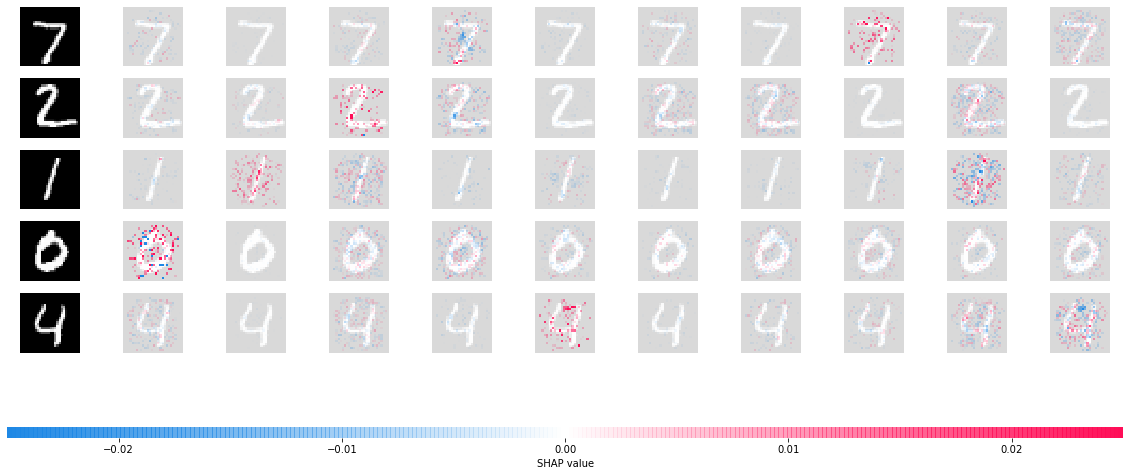

In [35]:
shap.image_plot(shap_values, test_images_reshape[:5])